<a href="https://colab.research.google.com/github/fadhan654/latihan1/blob/main/CitraDigital2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Szoboszlai.jpg to Szoboszlai.jpg


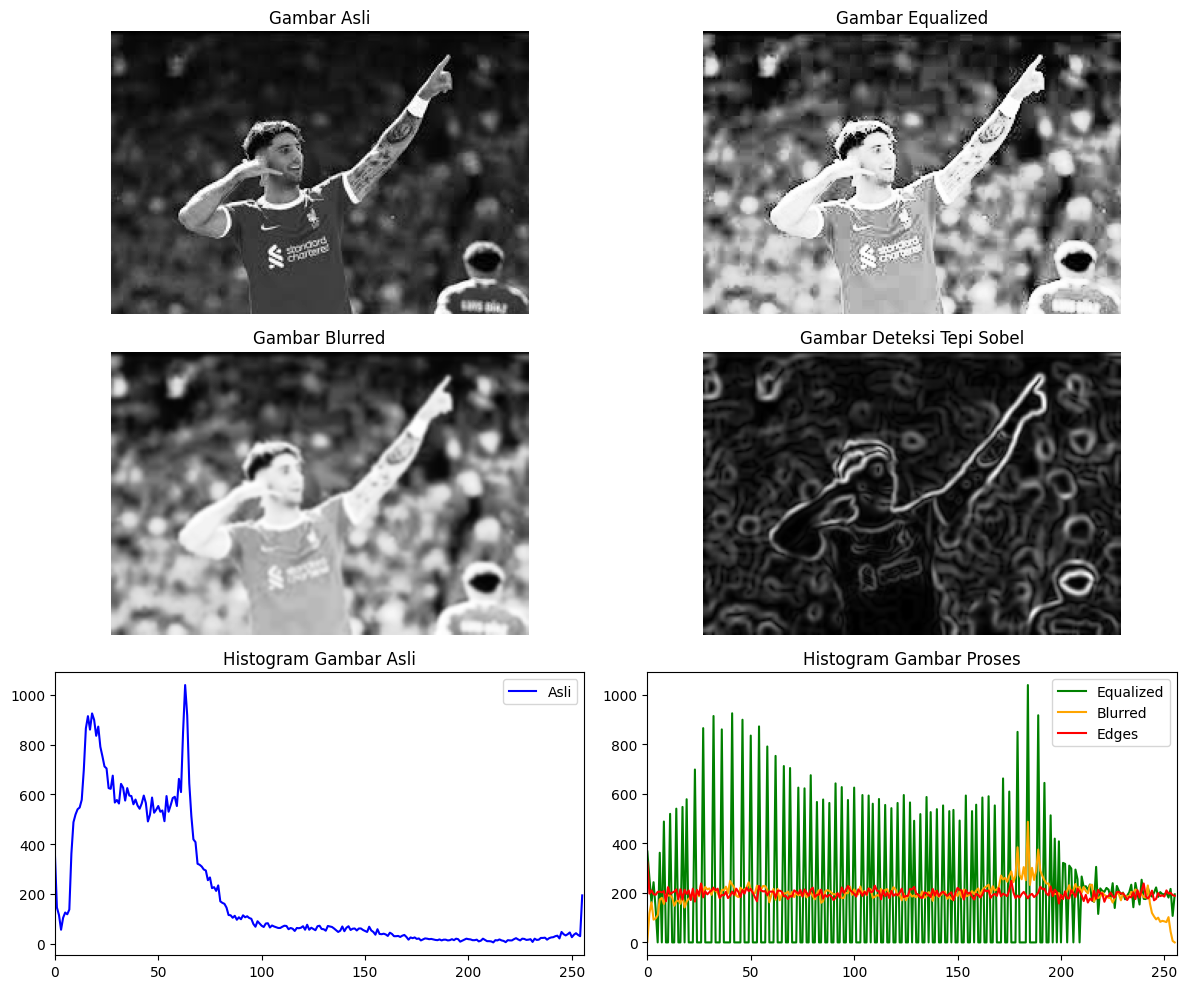

In [7]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload file
uploaded = files.upload()

# Ambil nama file yang diupload
image_path = next(iter(uploaded))

# Langkah 1: Memuat gambar dari file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Langkah 2: Equalization
equalized_image = cv2.equalizeHist(image)

# Langkah 3: Noise Reduction menggunakan Gaussian Blur
blurred_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

# Langkah 4: Deteksi tepi menggunakan Sobel Filter
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Langkah 5: Membuat histogram untuk setiap gambar
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
hist_blurred = cv2.calcHist([blurred_image], [0], None, [256], [0, 256])
hist_edges = cv2.calcHist([sobel_edges.astype(np.uint8)], [0], None, [256], [0, 256])

# Langkah 6: Menampilkan hasil
plt.figure(figsize=(12, 10))

# Gambar Asli
plt.subplot(3, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Gambar Equalized
plt.subplot(3, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Gambar Equalized')
plt.axis('off')

# Gambar Blurred
plt.subplot(3, 2, 3)
plt.imshow(blurred_image, cmap='gray')
plt.title('Gambar Blurred')
plt.axis('off')

# Gambar Deteksi Tepi Sobel
plt.subplot(3, 2, 4)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Gambar Deteksi Tepi Sobel')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(3, 2, 5)
plt.plot(hist_original, color='blue', label='Asli')
plt.title('Histogram Gambar Asli')
plt.xlim([0, 256])
plt.legend()

# Histogram Gambar Proses
plt.subplot(3, 2, 6)
plt.plot(hist_equalized, color='green', label='Equalized')
plt.plot(hist_blurred, color='orange', label='Blurred')
plt.plot(hist_edges, color='red', label='Edges')
plt.title('Histogram Gambar Proses')
plt.xlim([0, 256])
plt.legend()

plt.tight_layout()
plt.show()
